In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [26]:
normalizer = preprocessing.MinMaxScaler()

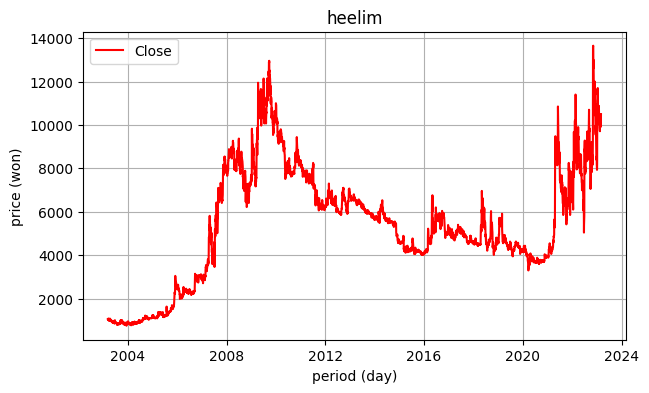

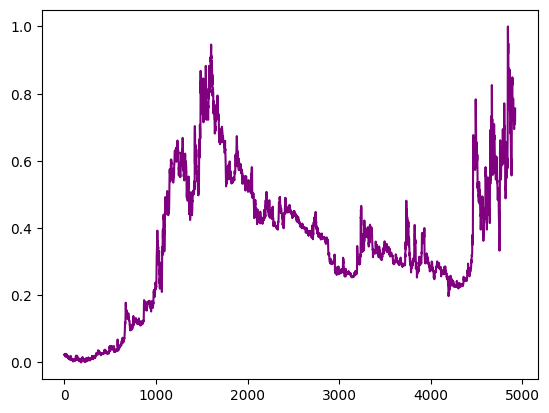

In [27]:
start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)

df_heelim = fdr.DataReader('037440', start_date)

prep_heelim = df_heelim
prep_heelim['Volume'] = df_heelim['Volume'].replace(0, np.nan)
prep_heelim = prep_heelim.dropna()
prep_heelim

plt.figure(figsize=(7,4))

plt.title('heelim')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(df_heelim['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

norm_cols = ['Open', 'Close', 'Volume']
norm_heelim_np = normalizer.fit_transform(prep_heelim[norm_cols])

norm_heelim = pd.DataFrame(norm_heelim_np, columns=norm_cols)
norm_heelim

plt.plot(norm_heelim['Close'], label='Close', color='purple')
plt.show()

In [28]:
feature_cols = ['Open', 'Close', 'Volume']
label_cols = ['Close']

feature_df = pd.DataFrame(norm_heelim, columns=feature_cols)
label_df = pd.DataFrame(norm_heelim, columns=label_cols)

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

In [29]:
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []

    for i in range(len(feature) - window_size):
        feature_list.append(feature[i:i + window_size])
        label_list.append(label[i + window_size])
    
    return np.array(feature_list), np.array(label_list)

window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)

In [30]:
split = -200

x_train = X[:split]
y_train = Y[:split]

x_test = X[split:]
y_test = Y[split:]

In [31]:
input_size = window_size
sequence_length = 3 # Open, Close, Volume
num_layers = 2
hidden_size = 256
num_classes = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 2

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'